# <u>Projet de Régression linéaire<u>

In [1]:
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### 1. <u>Dataset<u>

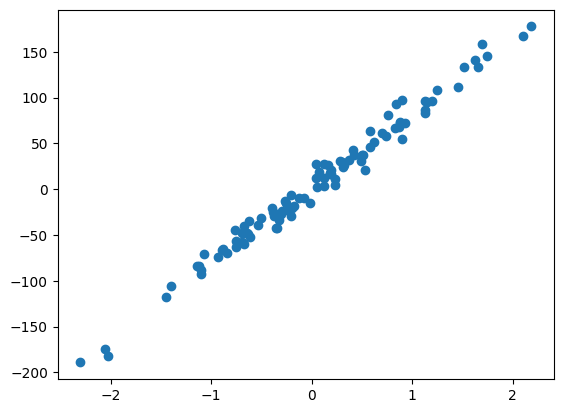

In [2]:
#Création d'un dataset avec des coordonées x (abscisse) et y (ordonnée).
#L'allure linéaire est générée par la fonction make_regression.

np.random.seed(1)
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y.reshape(y.shape[0], 1)
plt.scatter(x, y)

In [3]:
# Création de la matrice X à partir de x 
X = np.hstack((x, np.ones(x.shape)))

In [4]:
# Initialisation de la matrice theta
np.random.seed(1)
theta = np.random.randn(2, 1)
theta

array([[ 1.62434536],
       [-0.61175641]])

### 2. <u>Création du Modèle

In [5]:
# Création de notre modèle
def model(X, theta):
    return X.dot(theta)

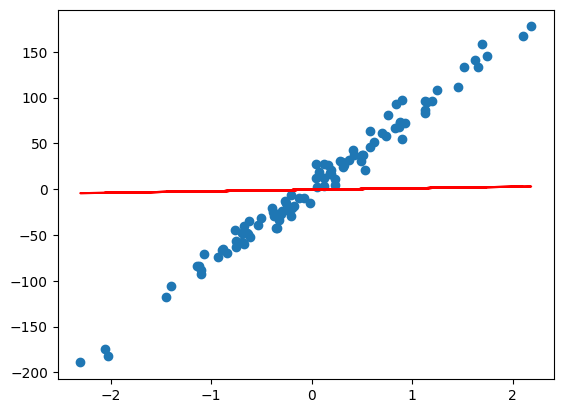

In [6]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

### 3. <u>Fonction Coût

In [7]:
# Création de la fonction coût
def cost_function(X, y, theta):
    m = len(y)
    return (np.sum((model(X, theta) - y)**2))/(2*m)

In [8]:
cost_function(X, y, theta)

2575.097451620713

### 4. <u>Descente de Gradient

In [9]:
# Calcul du gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [10]:
#Calcul de la descente de gradient
def gradient_descent(X, y, theta, alpha, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - alpha * grad(X, y, theta)
        #Fonction cout à l'itération i
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

### 5. <u>Entraînement du modèle

In [11]:
alpha = 1e-3
n_iterations = 10000

#Phase d'entraînement des paramètres
theta_final, cost_history = gradient_descent(X, y, theta, alpha, n_iterations)
theta_final

array([[81.5642129 ],
       [ 2.03491231]])

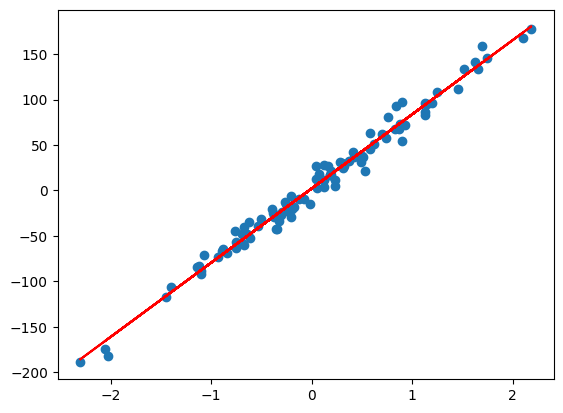

In [12]:
#Insertion dans le modèle et visualisation
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

### 6. <u>Courbe d'apprentissage

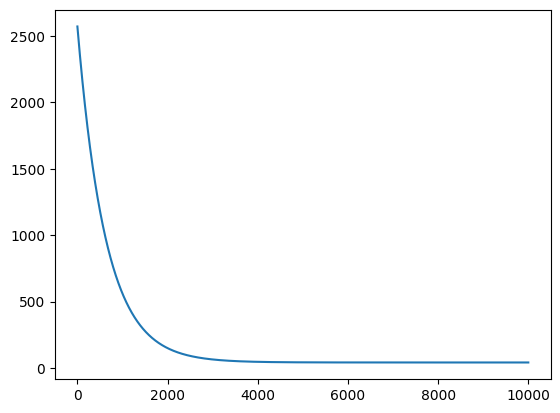

In [13]:
#Affichage de la fonction coût
plt.plot(range(10000), cost_history)

### 7. <u>Coefficient de détermination

In [14]:
#Calcul du Coefficient de Détermination
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [15]:
coef_determination (y, predictions)

0.9843121336947352

### 8. <u>Utilisation de Scikit Learn

In [16]:
#Découpage des données en données d'entraînement (80%) et de test (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

In [17]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [18]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[83.25070365]]
Mean squared error: 91.72
Coefficient of determination: 0.98


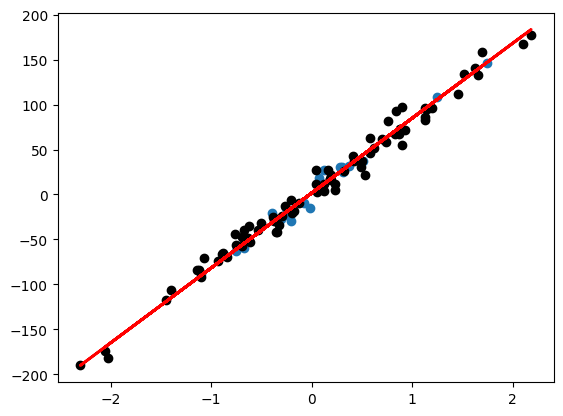

In [19]:
# Plot outputs
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="red", linewidth=2)
plt.show()